In [21]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [22]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [23]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [24]:
# Checking the number of unique classes 
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [25]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

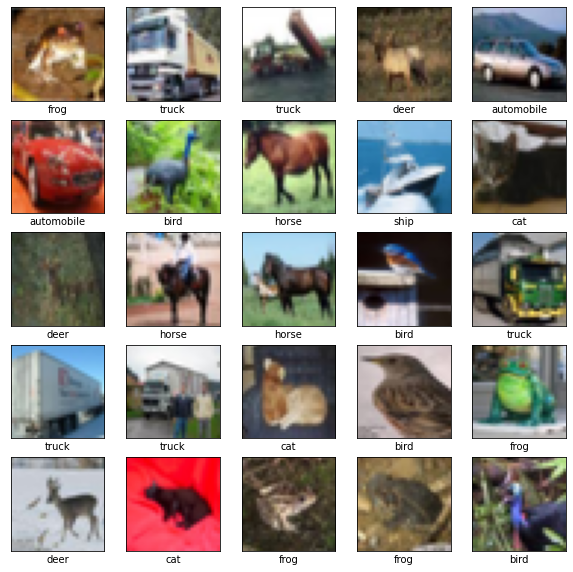

In [26]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [27]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# 1b) With padding

In [31]:
model = Sequential()

model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_23 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 32)       

In [32]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [33]:
layer = model.layers
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

conv2d_22 (3, 3, 16, 16)


In [35]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
782/782 [==============================] - 20s 23ms/step - loss: 2.1346 - accuracy: 0.2636 - val_loss: 1.6263 - val_accuracy: 0.3866
Epoch 2/5
782/782 [==============================] - 18s 23ms/step - loss: 1.5828 - accuracy: 0.4082 - val_loss: 1.6582 - val_accuracy: 0.4150
Epoch 3/5
782/782 [==============================] - 18s 23ms/step - loss: 1.3888 - accuracy: 0.4889 - val_loss: 1.1511 - val_accuracy: 0.5755
Epoch 4/5
782/782 [==============================] - 17s 22ms/step - loss: 1.2524 - accuracy: 0.5508 - val_loss: 1.0879 - val_accuracy: 0.6002
Epoch 5/5
782/782 [==============================] - 17s 22ms/step - loss: 1.1659 - accuracy: 0.5848 - val_loss: 1.1458 - val_accuracy: 0.6013


Text(0.5, 1.0, 'Loss Curves')

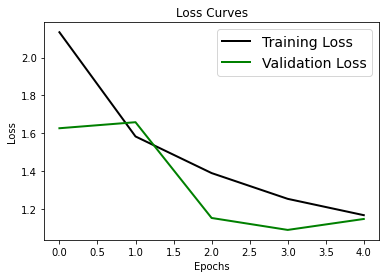

In [36]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

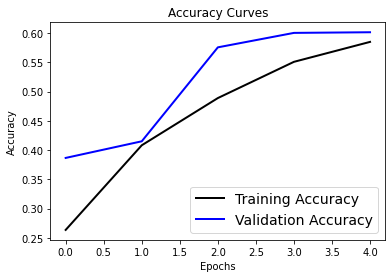

In [37]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [38]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[1.2360137e-03 1.2295205e-03 2.1978017e-02 ... 2.8853102e-03
  2.5320888e-02 1.7117158e-03]
 [4.9735200e-02 5.6909151e-02 4.3268717e-04 ... 7.3544717e-05
  8.8475305e-01 7.3006777e-03]
 [4.5746766e-02 9.2656482e-03 5.3915032e-03 ... 1.0215183e-03
  9.1929466e-01 6.0320529e-03]
 ...
 [5.8681663e-04 1.4156353e-04 2.0773746e-02 ... 1.5884006e-01
  3.5866181e-04 4.7376286e-04]
 [2.3485158e-01 7.9180352e-02 1.4583774e-01 ... 1.3911265e-01
  2.4628468e-02 8.6163487e-03]
 [4.6110066e-04 1.6205139e-04 2.0613451e-03 ... 8.4677154e-01
  1.3264366e-05 7.0809598e-05]]
[3 8 8 ... 5 4 7]


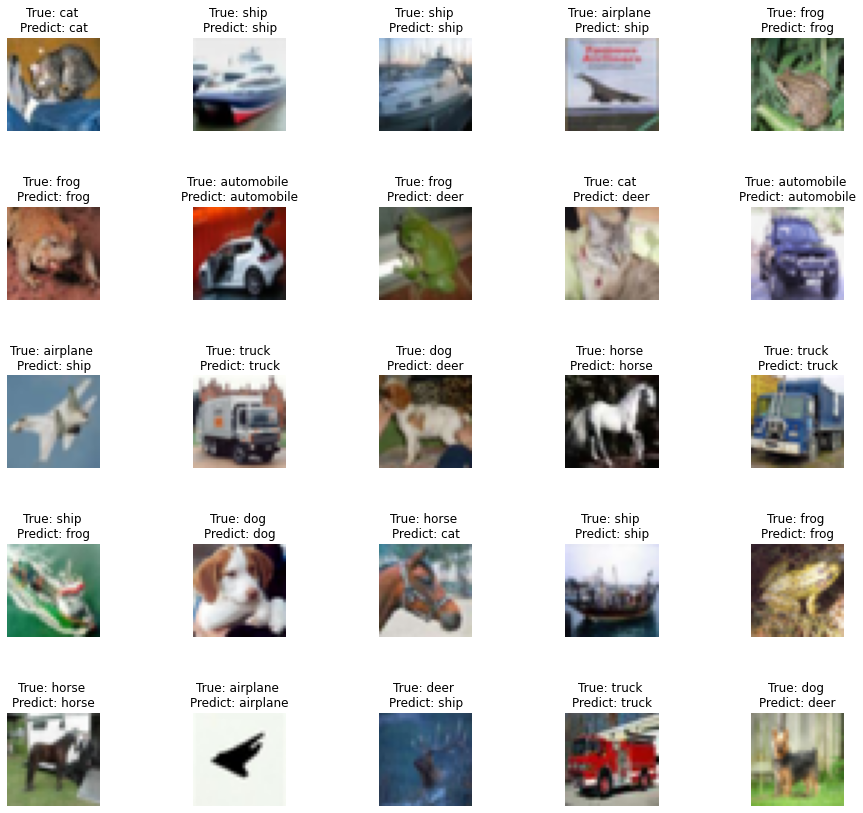

In [39]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 1a) Without Padding

In [40]:
model = Sequential()

model.add(layers.Conv2D(16, (3,3), padding='valid', activation='relu', input_shape=(32,32,3)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3,3), padding='valid', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(32, (3,3), padding='valid', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='valid', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3,3), padding='valid', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_30 (Bat  (None, 28, 28, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 32)       

In [41]:
layer = model.layers
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

conv2d_29 (3, 3, 16, 16)


In [43]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [44]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 13s 15ms/step - loss: 2.2158 - accuracy: 0.2309 - val_loss: 1.8702 - val_accuracy: 0.3074
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.7378 - accuracy: 0.3408 - val_loss: 1.5280 - val_accuracy: 0.4416
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 1.5737 - accuracy: 0.4188 - val_loss: 1.4627 - val_accuracy: 0.4663
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 1.4686 - accuracy: 0.4656 - val_loss: 1.2681 - val_accuracy: 0.5452
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 1.3964 - accuracy: 0.4983 - val_loss: 1.4740 - val_accuracy: 0.4927
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 1.3374 - accuracy: 0.5242 - val_loss: 1.2154 - val_accuracy: 0.5620
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 1.2995 - accuracy: 0.5402 - val_loss: 1.2325 - val_accuracy:

Text(0.5, 1.0, 'Loss Curves')

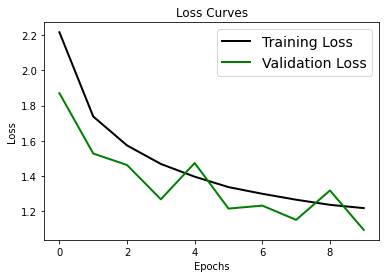

In [45]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

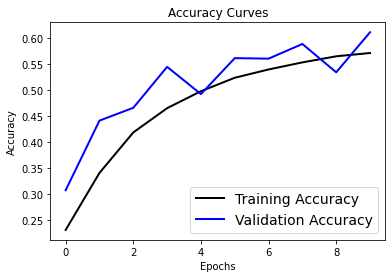

In [46]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [47]:
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[3.67036089e-03 1.62318698e-03 2.70962287e-02 ... 2.33589532e-03
  4.29498330e-02 3.88247496e-03]
 [7.82642961e-02 2.08343074e-01 1.11697509e-03 ... 9.22553518e-05
  6.91881239e-01 1.88107751e-02]
 [1.36808217e-01 1.15056165e-01 2.05948018e-02 ... 9.83952428e-04
  6.66167498e-01 2.90458798e-02]
 ...
 [1.49413093e-03 2.25394571e-04 3.27000767e-02 ... 3.65292318e-02
  6.10218209e-04 6.04759087e-04]
 [6.29332364e-02 1.64650410e-01 2.67541349e-01 ... 5.34472167e-02
  1.29876994e-02 1.47319045e-02]
 [1.32253324e-03 3.33545409e-04 2.34375112e-02 ... 4.40722972e-01
  7.17336225e-05 6.73912291e-04]]
[3 8 8 ... 5 2 4]


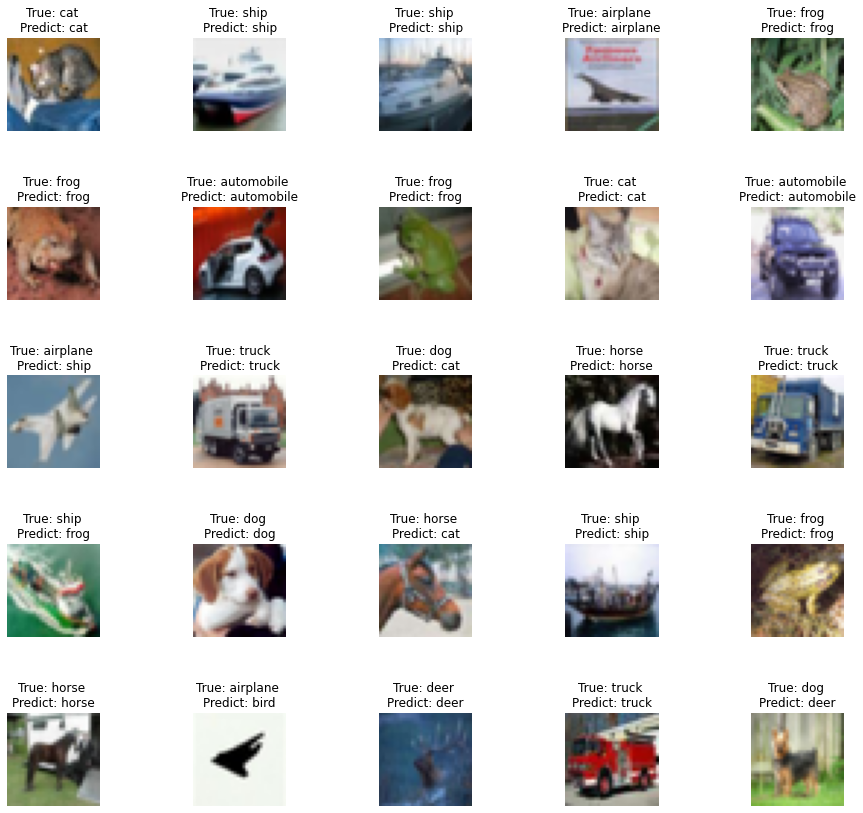

In [48]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 2) Without pooling layer.

In [49]:
model = Sequential()

model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_35 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_36 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

In [50]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [51]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
782/782 [==============================] - 62s 76ms/step - loss: 1.7255 - accuracy: 0.4155 - val_loss: 1.3903 - val_accuracy: 0.5160
Epoch 2/5
782/782 [==============================] - 61s 78ms/step - loss: 1.1689 - accuracy: 0.5859 - val_loss: 0.9963 - val_accuracy: 0.6473
Epoch 3/5
782/782 [==============================] - 61s 78ms/step - loss: 0.9557 - accuracy: 0.6659 - val_loss: 0.8182 - val_accuracy: 0.7132
Epoch 4/5
782/782 [==============================] - 61s 78ms/step - loss: 0.8412 - accuracy: 0.7047 - val_loss: 0.8724 - val_accuracy: 0.6919
Epoch 5/5
782/782 [==============================] - 59s 76ms/step - loss: 0.7693 - accuracy: 0.7298 - val_loss: 0.7341 - val_accuracy: 0.7459


Text(0.5, 1.0, 'Loss Curves')

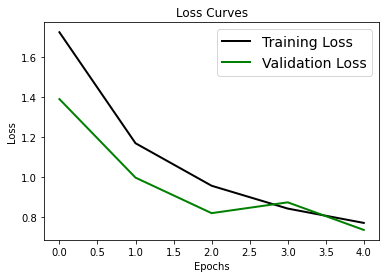

In [52]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

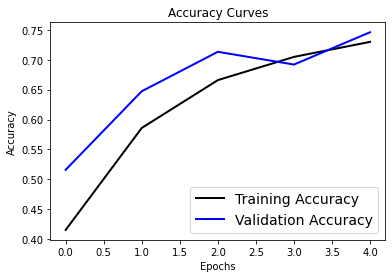

In [53]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [54]:
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[2.6044381e-04 6.7444635e-05 5.5325520e-04 ... 1.4385996e-04
  1.0258852e-02 2.1985301e-04]
 [3.4792998e-03 4.9718209e-03 5.0410659e-07 ... 6.4552510e-09
  9.9124920e-01 2.9857919e-04]
 [5.8126517e-02 3.6707742e-03 1.6605052e-04 ... 2.4916010e-06
  9.3726271e-01 6.3897012e-04]
 ...
 [3.1957810e-05 1.3652293e-06 1.2134146e-02 ... 4.7550141e-03
  3.0132103e-05 6.6676503e-06]
 [4.3688715e-01 4.3986338e-01 1.0242500e-02 ... 4.8525520e-03
  4.1586626e-03 2.9061299e-03]
 [9.6373733e-06 2.3232094e-06 4.1917316e-04 ... 9.6977127e-01
  3.2875084e-06 2.6245998e-06]]
[3 8 8 ... 5 1 7]


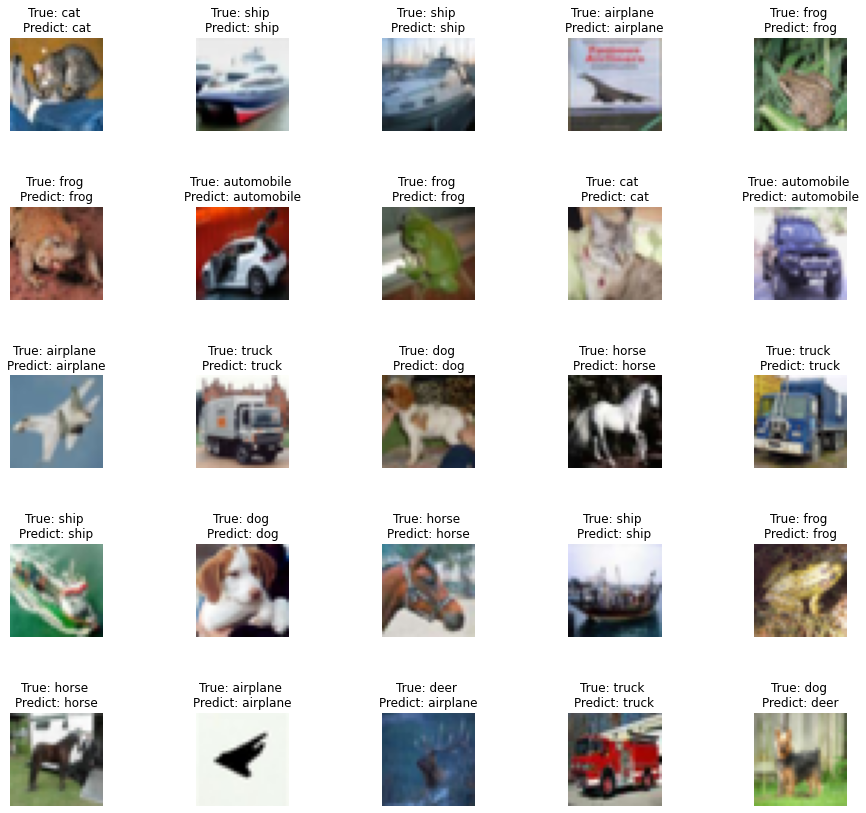

In [55]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 3) Increasing the number of filters in each layer by a factor of 2.

In [56]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_42 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 64)       

In [57]:
layer = model.layers
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

conv2d_41 (3, 3, 32, 32)


In [58]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [59]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
782/782 [==============================] - 26s 31ms/step - loss: 1.9310 - accuracy: 0.3283 - val_loss: 1.9952 - val_accuracy: 0.3129
Epoch 2/5
782/782 [==============================] - 25s 32ms/step - loss: 1.3624 - accuracy: 0.5017 - val_loss: 1.2195 - val_accuracy: 0.5739
Epoch 3/5
782/782 [==============================] - 24s 30ms/step - loss: 1.1508 - accuracy: 0.5880 - val_loss: 1.0333 - val_accuracy: 0.6299
Epoch 4/5
782/782 [==============================] - 25s 32ms/step - loss: 1.0277 - accuracy: 0.6342 - val_loss: 1.1138 - val_accuracy: 0.6341
Epoch 5/5
782/782 [==============================] - 23s 30ms/step - loss: 0.9194 - accuracy: 0.6784 - val_loss: 1.0698 - val_accuracy: 0.6285


Text(0.5, 1.0, 'Loss Curves')

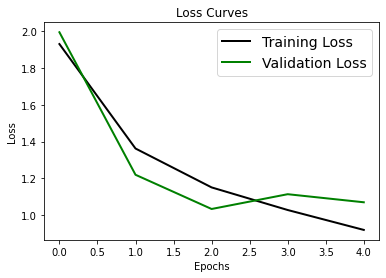

In [60]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

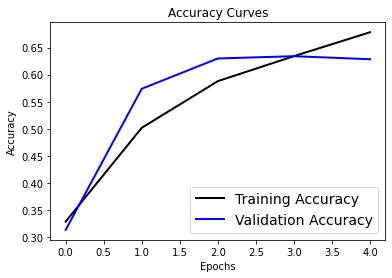

In [61]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [62]:
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[6.74657105e-03 7.79563328e-03 1.33581022e-02 ... 4.29509999e-03
  1.22526281e-01 2.20219977e-02]
 [3.51434276e-02 6.63226396e-02 9.02076572e-05 ... 3.10647956e-05
  8.72112513e-01 2.57918369e-02]
 [1.39226168e-01 1.36496738e-01 2.28496664e-03 ... 1.46797195e-03
  6.07616961e-01 8.43433812e-02]
 ...
 [2.94472877e-04 1.16190364e-04 3.76006700e-02 ... 3.60536464e-02
  3.58988502e-04 2.59229419e-04]
 [3.37382764e-01 3.14162850e-01 4.54312861e-02 ... 1.64055377e-02
  6.72027795e-03 4.15380523e-02]
 [1.41981829e-04 7.75858716e-05 8.87922826e-04 ... 9.68627453e-01
  1.96353849e-05 1.32043977e-04]]
[3 8 8 ... 5 0 7]


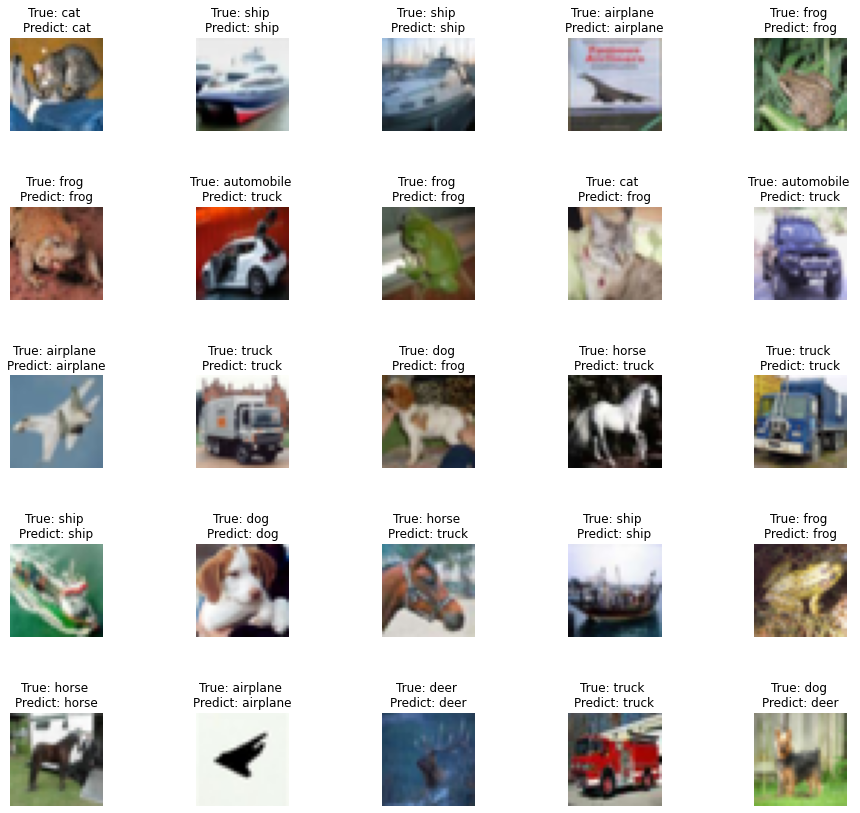

In [63]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)